# Breast Cancer PCA Project

## Problem
We will look at a breast cancer dataset from sklearn with many dimensions. This dataset has 30 features and the target variable is whether a tumar is malignant or benign. In order to analyze and visualize this data, we will use PCA to lower the dimensionality of the data to two principal components.

## Understanding the Data

In [1]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# to allow the output of plotting commands to be displayed inline
%matplotlib inline
# turn off jedi to allow for faster tab autocomplete usage
%config Completer.use_jedi = False

# set global styling
sns.set_style('whitegrid')

# set object as variable
cancer = load_breast_cancer()

cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [2]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
# create dataframe with feature variables
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
# target column categories
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

## Data Transformation

I'll start off by standardizing all of the feature variables.

In [7]:
# instantiate StandardScaler object
scaler = StandardScaler()

# fit features to scaler model
scaler.fit(df)

# transform features to a scaled version
scaled_data = scaler.transform(df)

# instantiate the PCA object and specify number of compenents to keep
pca = PCA(n_components=2)

# find the principal components using fit method
pca.fit(scaled_data)

# transform data to its first 2 principal compenents
x_pca = pca.transform(scaled_data)

print('Initial data shape: ', scaled_data.shape)
print('Transformed data shape: ', x_pca.shape)

Initial data shape:  (569, 30)
Transformed data shape:  (569, 2)


We have reduced the 30 dimensions down to 2.

## Data Analysis

Text(0.5, 1.0, 'First vs Second Principal Component by Target')

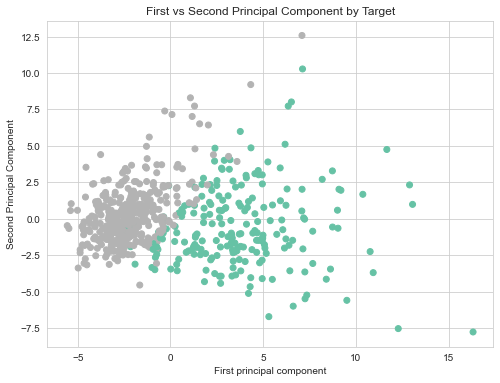

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'], cmap='Set2')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.title('First vs Second Principal Component by Target')

By using these two compenents, we can separate the target into two classes very clearly.

In [28]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

Text(0.5, 1.0, 'Correlation of Principal Compenents to Original Features')

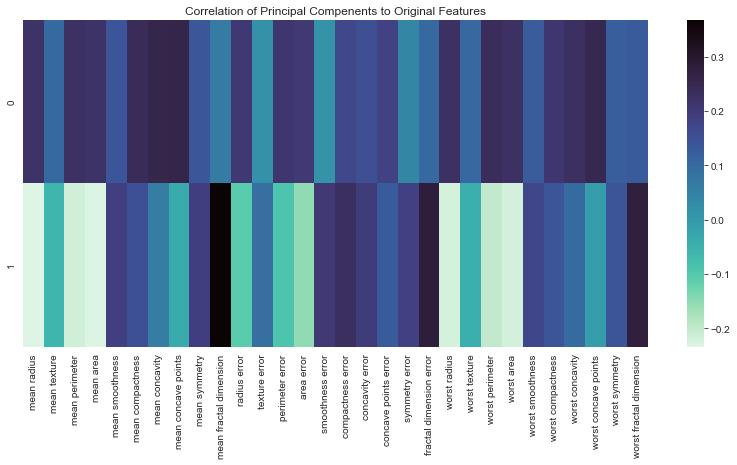

In [27]:
# create new df for PCA components
df_comp = pd.DataFrame(pca.components_,columns=cancer['feature_names'])

plt.figure(figsize=(14,6))
sns.heatmap(df_comp,cmap='mako_r')
plt.title('Correlation of Principal Compenents to Original Features')

The higher the colour, the more correlated the principal components are to a given feature with zero being no correlation and negative values having inverse correlation.    

From this, I can see that the first principal component is highly correlated to mean concavity, mean concave points and worst concave points to name a few.    

The second principal component is highly correlated with mean fractal dimension and also highly inversely correlated to mean area and worst radius.